#### Data wrangling and Preprocessing

In [1]:
#importing the packages
import pandas as pd
import datetime
#reading the file
data1 = pd.DataFrame(pd.read_csv("Crashes_last5.csv"))
#specifying the columns we are interested in
cols=['X', 'Y', 'ACCIDENT_NO',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME',
       'DAY_OF_WEEK', 'DCA_CODE', 'LIGHT_CONDITION',
        'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE',
       'RUN_OFFROAD', 'NODE_ID', 'NODE_TYPE',
        'REGION_NAME', 'TOTAL_PERSONS',
       'INJ_OR_FATAL', 'FATALITY', 'SERIOUSINJURY', 'OTHERINJURY',
       'NONINJURED', 'MALES', 'FEMALES', 'BICYCLIST', 'PASSENGER', 'DRIVER',
       'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN', 'PED_CYCLIST_5_12',
       'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER', 'YOUNG_DRIVER',
       'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES', 'HEAVYVEHICLE',
       'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'LGA_NAME_ALL', 'SRNS',
       'RMA', 'STAT_DIV_NAME']

In [ ]:
#correcting the format of the time for program to convert it to datetime format. 
Dataset=data1[cols]
Dataset['ACCIDENT_TIME'] = pd.to_datetime(Dataset['ACCIDENT_TIME'],format='%H.%M.%S')

In [2]:
#filtering based on time range (biological sleep times)
NightDf=Dataset[Dataset['ACCIDENT_TIME'].dt.strftime('%H:%M:%S').between('00:00:00','07:00:00')]
AfternoonDf=Dataset[Dataset['ACCIDENT_TIME'].dt.strftime('%H:%M:%S').between('13:00:00','16:00:00')]
Dataset=NightDf.append(AfternoonDf)
Dataset['ACCIDENT_TIME']=Dataset['ACCIDENT_TIME'].dt.time

C:\Users\arane\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
#filtering if alcohol related or not
Dataset=Dataset[Dataset['ALCOHOL_RELATED']=="No"]
#excluding all the unlicensed drivers
Dataset=Dataset[Dataset['UNLICENCSED']==0]
#excluding all the pedestrians
Dataset=Dataset[Dataset['PEDESTRIAN']==0]
#excluding ped cyclists from age 5 to 12 yrs
Dataset=Dataset[Dataset['PED_CYCLIST_5_12']==0]
#excluding ped & cyclists from age 13 to 18 yrs
Dataset=Dataset[Dataset['PED_CYCLIST_13_18']==0]
#ecluding old-age peds
Dataset=Dataset[Dataset['OLD_PEDESTRIAN']==0]

In [4]:
#exlcuding peds, overtaking,etc related accidents
FilteredDCA=['CROSS TRAFFIC(INTERSECTIONS ONLY)',
       'OFF END OF ROAD/T-INTERSECTION.',
       'OFF LEFT BEND INTO OBJECT/PARKED VEHICLE',
       'RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE',
       'OTHER ADJACENT (INTERSECTIONS ONLY)',
       'STRUCK OBJECT ON CARRIAGEWAY', 'FELL IN/FROM VEHICLE',
       'STRUCK ANIMAL', 'REAR END(VEHICLES IN SAME LANE)',
       'OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE',
       'LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE',
       'LEFT NEAR (INTERSECTIONS ONLY)', 'LEFT TURN SIDESWIPE',
       'RIGHT NEAR (INTERSECTIONS ONLY)',
       'LANE CHANGE LEFT (NOT OVERTAKING)',
       'OFF CARRIAGEWAY ON LEFT BEND', 'RIGHT THROUGH', 'RIGHT REAR.',
       'RIGHT FAR (INTERSECTIONS ONLY)', 'OFF CARRIAGEWAY ON RIGHT BEND',
       'VEHICLE COLLIDES WITH VEHICLE PARKED ON LEFT OF ROAD',
       'OUT OF CONTROL ON CARRIAGEWAY (ON STRAIGHT)',
       'LANE CHANGE RIGHT (NOT OVERTAKING)', 'HEAD ON (NOT OVERTAKING)',
       'PERMANENT OBSTRUCTION ON CARRIAGEWAY', 'LEAVING PARKING',
       'OFF CARRIAGEWAY TO LEFT',
       'OUT OF CONTROL ON CARRIAGEWAY (ON BEND)',
       'OFF CARRIAGEWAY TO RIGHT',
       'TWO RIGHT TURNING (INTERSECTIONS ONLY)',
       'VEHICLE STRIKES ANOTHER VEH WHILE EMERGING FROM DRIVEWAY',
       'U TURN', 'LANE SIDE SWIPE (VEHICLES IN PARALLEL LANES)',
       'U TURN INTO FIXED OBJECT/PARKED VEHICLE',
       'ACCIDENT OR BROKEN DOWN',
       'OTHER SAME DIRECTION-MANOUEVRES NOT INCLUDED IN DCAs 130-137',
       'REVERSING IN STREAM OF TRAFFIC',
       'OTHER ACCIDENTS-OFF STRAIGHT NOT INCLUDED IN DCAs 170-175',
       'VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY', 'LEFT REAR',
       'STRUCK TRAIN',
       'UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS IN ACCIDENT',
       'VEHICLE STRIKES DOOR OF PARKED/STATIONARY VEHICLE',
       'OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148',
       'OTHER OVERTAKING MANOEUVRES NOT INCLUDED IN DCAs 150-154',
       'RIGHT TURN SIDESWIPE',
       'OTHER OPPOSING MANOEUVRES NOT INCLUDED IN DCAs 120-125.',
       'OTHER ACCIDENTS NOT CLASSIFIABLE ELSEWHERE',
       'STRUCK RAILWAY CROSSING FURNITURE', 'PULLING OUT -REAR END',
       'TEMPORARY ROADWORKS',
       'OTHER ACCIDENTS ON CURVE NOT INCLUDED IN DCAs 180-184',
       'OTHER ON PATH',
       'LEFT FAR (INTERSECTIONS ONLY)',
       'RIGHT/LEFT. ONE VEH TURNING RIGHT THE OTHER LEFT.',
       'RIGHT/LEFT FAR (INTERSECTIONS ONLY)',
       'LOAD OR MISSILE STRUCK VEHICLE', 'ENTERING PARKING',
       'REVERSING INTO FIXED OBJECT/PARKED VEHICLE', 'LEFT THROUGH',
       'TWO LEFT TURNING (INTERSECTIONS ONLY)',
       'PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.',
       'RIGHT/RIGHT BOTH VEHs FROM OPPOSITE DIRECTIONS TURNING RIGHT',
       'PARKED CAR RUN AWAY']

In [5]:
Dataset=Dataset[Dataset['DCA_CODE'].isin(FilteredDCA)]
#excluding all other speedzones which are less than 60 kmph
Speedfilter = ['60 km/hr', '100 km/hr', '110 km/hr','80 km/hr', '70 km/hr','90 km/hr', '75 km/hr']
#including accidents that involves running off the road irrespective of the speed zone.
offroadyes=Dataset[Dataset['RUN_OFFROAD']=='Yes']
#the accidents which do not involve running off the carriageway, will be checked further if they are in the timezones.
offroadno=Dataset[Dataset['RUN_OFFROAD']=='No']
offroadno=offroadno[offroadno['SPEED_ZONE'].isin(Speedfilter)]
#appending together
Dataset=offroadno.append(offroadyes)
#renaming the column names
Dataset=Dataset.rename(columns={"X":"Longitude","Y":"Latitude"})
#writing to the csv file
Dataset.to_csv("Filtered.csv", index=False, header = True)

#### Density Based Clustering algorithm (Unsupervised)

In [9]:
#importing all the libraries required for the clustering algorithm
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import numpy as mp
coords = Dataset[['Latitude', 'Longitude']].to_numpy()

##### High severity

In [ ]:
#setting the radius of the earth in radians
kms_per_radian = 6371.0088
#deciding the radius for the clusters
epsilon = .5/ kms_per_radian
#calling the Density based clustering algorithm
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
#printing the number of clusters
print('Number of clusters: {}'.format(num_clusters))

In [ ]:
#function to calculate the centroid of the cluster and assigning the centermost point to the cluster.
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters[:-2].map(get_centermost_point)
#zipping together into one dataframe
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

#fetching the entire rows of the main dataframe, by using latitude longitudes just calculated/
rs = rep_points.apply(lambda row: Dataset[(Dataset['Latitude']==row['lat']) & (Dataset['Longitude']==row['lon'])].iloc[0], axis=1)

#writing to the csv file
rs.to_csv("HighSeverity.csv",header=True,index=False)

In [1]:
#plotting the clusters on the graph
fig, ax = plt.subplots(figsize=[10, 6]
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='k', alpha=0.7, s=3)
ax.set_title('DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-320bac222419>, line 3)

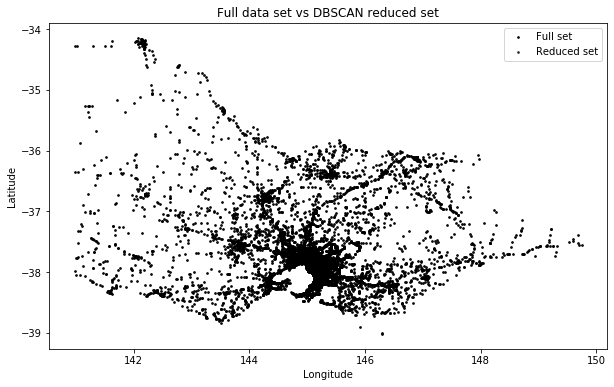

In [392]:
#plotting the full dataset (15151 rows)
fig, ax = plt.subplots(figsize=[10, 6])
df_scatter = ax.scatter(Dataset['Longitude'], Dataset['Latitude'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()


##### Least severity

In [ ]:
#similarly for least severity

Number of clusters: 781


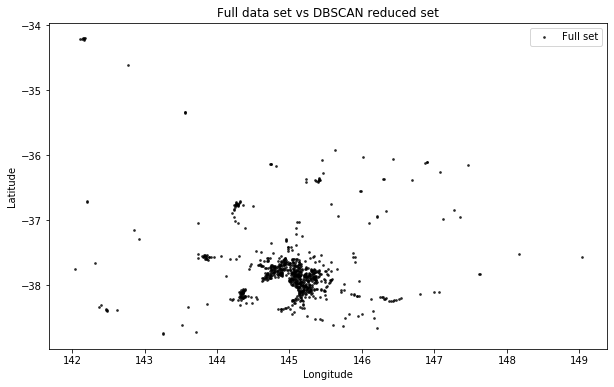

In [23]:
kms_per_radian = 6371.0088
epsilon = .5/ kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters[:-2].map(get_centermost_point)

lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

rs = rep_points.apply(lambda row: Dataset[(Dataset['Latitude']==row['lat']) & (Dataset['Longitude']==row['lon'])].iloc[0], axis=1)
rs = rs[['Latitude','Longitude']]
rs.to_csv("LeastSeverity.csv",header=True,index=False)

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='k', alpha=0.7, s=3)
ax.set_title(' DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([rs_scatter], ['Reduced set'], loc='upper right')
plt.show()

##### Medium severity

In [ ]:
#similarly for medium severity

Number of clusters: 404


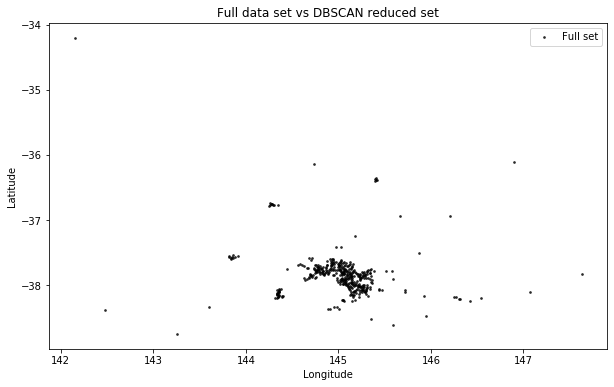

In [24]:
kms_per_radian = 6371.0088
epsilon = .5/ kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters[:-2].map(get_centermost_point)

lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

rs = rep_points.apply(lambda row: Dataset[(Dataset['Latitude']==row['lat']) & (Dataset['Longitude']==row['lon'])].iloc[0], axis=1)
rs = rs[['Latitude','Longitude']]
rs.to_csv("MediumSeverity.csv",header=True,index=False)

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['Longitude'], rs['Latitude'], c='k', alpha=0.7, s=3)
ax.set_title('DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([rs_scatter], ['Reduced set'], loc='upper right')
plt.show()